<a href="https://colab.research.google.com/github/jakubmis1998/NeuralNetworks/blob/main/PLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

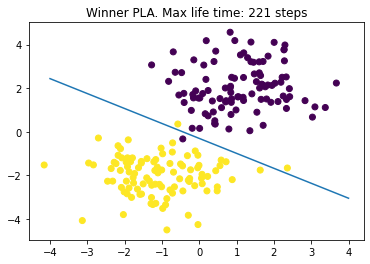

In [152]:
# PLA (Pocket Learning Algorithm)

import numpy as np
from matplotlib import pyplot as plt
import time

def update_plot(w, THETA, iteration):
  x1, x2 = -4, 4
  plt.title("PLA {}".format(iteration))
  plt.scatter(E[:, 0], E[:, 1], c=T)
  plt.plot([x1, x2], [
    -w[0][0]/w[0][1] * x1 + THETA/w[0][1],
    -w[0][0]/w[0][1] * x2 + THETA/w[0][1]
  ]);
  plt.show()

if __name__ == "__main__":
  # 100 samples 2D moved over [1, 2]
  A = np.random.randn(100, 2) + [1, 2]
  # First and second column
  Ax = A[:, 0]
  Ay = A[:, 1]
  # plt.scatter(Ax, Ay)

  # 100 samples 2D moved over [-1, -2]
  B = np.random.randn(100, 2) + [-1, -2]
  Bx = B[:, 0]
  By = B[:, 1]
  # plt.scatter(Bx, By)

  # Samples for perceptron learning
  E = np.zeros((200, 2))
  E[0:100] = A
  E[100:200] = B

  # True results for perceptron learning
  T = np.zeros((200,))
  T[0:100] = -1
  T[100:200] = 1

  # Perceptron learning variables
  iteration_count = 500
  learning_rate = 0.1
  k = 100
  N = 2
  THETA = np.random.randn(1)
  w = np.random.rand(1, N)
  processed = np.full(k * N, False)  # Processed samples
  global_life_time = 0
  local_life_time = 0
  best_weights = w

  # Perceptron learning
  for index in range(iteration_count):
    # Random index of examples
    j = np.random.randint(0, 200)

    # Output - result of the neural operation on E[j] - single sample
    O = 0
    for i in range(N):
      O += w[0][i] * E[j, i]
    O -= THETA
    if O >= 0:
      O = 1
    else:
      O = -1

    # Calculate error
    ERR = T[j] - O

    # Incorrect calculating
    if ERR != 0:
      # Vectors adding, reset life time
      for i in range(N):
        w[0][i] += learning_rate * ERR * E[j, i]
        THETA -= learning_rate * ERR
      local_life_time = 0
    else:
      # Increase life time and store winner
      local_life_time += 1
      if global_life_time < local_life_time:
        global_life_time = local_life_time
        best_weights = w

    # Uncomment if you want more charts
    # if (index % 30 == 0):
      # update_plot(w, THETA, index)
  
  # Winner draw plot
  plt.title("Winner PLA. Max life time: {} steps".format(global_life_time))
  plt.scatter(E[:, 0], E[:, 1], c=T)
  x1, x2 = -4, 4
  plt.plot([x1, x2], [
    -best_weights[0][0]/best_weights[0][1] * x1 + THETA/best_weights[0][1],
    -best_weights[0][0]/best_weights[0][1] * x2 + THETA/best_weights[0][1]
  ]);
